# Mark Drummond - Capstone Data Audit Report - An investigation of wearables illness and recovery
BUAN 6590 Summer 2021:
Mark Drummond- Fairfield University


This project is to research and identify correlations between different metrics available with off the shelf wearables and develop an algorithm that can predict onset of moving from one state to another.	 Multiclass Classification problem.



## Assumptions
1. Calculated Fields
*	 Calculate the 7 day and 28-day heart rate average (
*	 Calculate 7 day and 28 day 1, 2, 3 and above 3 std dev from average
*	 Calculate if the 7-day average is above, at or below the 28-day average
2.	Target Data set
*	Change the Current Status in to 4
*	How to add to the Merges Data set on a daily Basis
*	Weeks are Wednesday to Tuesday
*	Survey done on Tuesday but may be turned in after
> If date is a Tuesday , then survey date = date
>
> If date not Tuesday then survey date = prior Tuesday’s date
* PSS score
> 0-13 low stress
>
> 14-26 Mod
>
> 26-40 High School
3.	Drop any dates not in date rage of Weekly Survey data
* Survey dates are 5/19/2020 to 4/10/2020
> Only use daily records from 5/13/2020 – 4/6/2021
* Weeks are Wednesday to Tuesday
* Survey done on Tuesday but may be turned in after




##**Multi classification Model evaluation metrics**

There are a number of different evaluation metrics that can be used to evaluate a model.

> This study used **Accuracy** as the metric for the best model because the final dataset was balanced and the skewness had been taken out.


> **Precision** might have been a better metric since it is a better evaluation metric when we want to be very sure of the prediction. While the results are not like a cancer diagnoses (possible life and death) the clinician will be using the prediction to change the protocol for the patient. 


> **Recall** would not have been appropriate since it would have just given the percentage of actual positive that were correctly classified. 


> **F1 Score** would not been appropriate since it gives equal weight to precision and recall and recall is not appropriate.


> **Log Loss/Binary Crossentropy** while this works well with balanced dataset this is not a binary question.


> **Categorical Crossentropy** would be a good choice for next steps when using Neural Network models.

> **AUC ROC** is only appropriate for binary classification problems. 



##**Using CRISP-DM framework**

>Business Understanding

>Data Understanding

>Data Preparation

>Modeling

>Evaluation


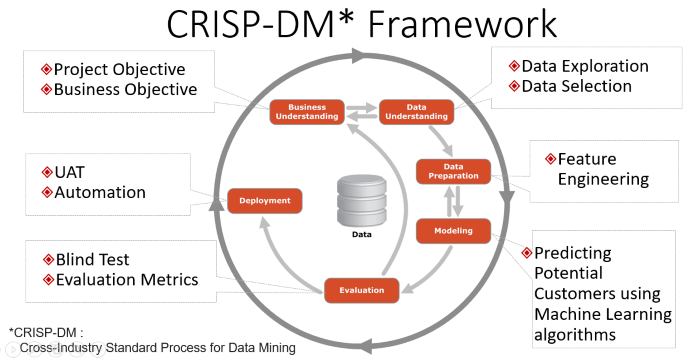

## [1. Business Understanding]()

I Worked with my SME, Nick Pfaff to understand what questions they were trying to answer.
Wanted two things
>Validation of what they were seeing and interpreting on the dashboard
>
>Method to predict where the patient was headed  (same, better,  stress, injury) 

Also worked with my other SME, Jessica Drummond who is was looking at recovery and wanted a way to predict when a patient was in a recovery phase.
The end goal for both is to be able to customize plans to better help the individual patient.



> The Analytical Problem
>
>> This project is to research and identify correlations between different metrics available with off the shelf wearables and develop an algorithm that can predict onset of moving from one state to another. Multiclass Classification problem
>

>
>4 possible states:
>
> - Better
> - Same	
> - Stressed
> - Unwell (Injured, ill, chronic, distress)



## [2. Data Understanding](https://drive.google.com/file/d/1gaKr0_L_iLd6UPHM9rEsoqWV248o9o5S/view?usp=sharing)

Review the 7 Original Data Sets with SWEETVIZ

- Dataset Size
- Dataset Datatypes
- Dataset Statistics
- Dataset Zero's and Nan's
- Visualize Dataset
- Dataset Skewness
- Correlation Analysis


|     Data Set    |     Source    |     Size    |
|-|-|-|
|     Activity   Records    |     BigQuery    |     (200686,   20)     |
|     Body   Battery    |     BigQuery    |     (138099,   10)    |
|     Metrics    |     BigQuery    |     (34337,   6)    |
|     Sleep    |     BigQuery    |     (401485,   10)    |
|     Registration    |     SpreadSheet    |     (497,   12)    |
|     Baseline    |     SpreadSheet    |     (282,   101)    |
|     Survey   Result    |     SpreadSheet    |     (6148,   98)    |

## [3. Data Preparation](https://colab.research.google.com/drive/1Jho4oq3LB-Utl0CCPFZOv8ulySN_x77Y?usp=sharing)

This is the stage of the project where you decide on the data that you're going to use for analysis. The criteria you might use to make this decision include the relevance of the data to your data mining goals, the quality of the data, and also technical constraints such as limits on data volume or data types. Note that data selection covers selection of attributes (columns) as well as selection of records (rows) in a table.

Table of Content:
0. Loading Modules, Functions and Dataset
1. Load the Data
2. Clean The Data
3. Merge Data sets
4. Clean up Merged Data Set
5. Add Additional Predictors
6. Create and Clean Target Data Set
7. EDA on Combined Data Set

**Removed Duplicate Records**
- Activity
- Body Battery
- Metrics
- Sleep Records
- Registration
- Survey
 
**Expanded 2 columns in the Activity Records**
-Heart rate - {'minimum' 'maximum', 'resting’}
-Stress Rate - {'average', 'qualifier', 'duration'{'rest': 'activity':, 'low':, 'medium':, 'high': }}
 
**Merge the data sets together **
 
**Clean Up the Merged data set**
- Changed column data types
- Changed the ‘date’ data type from object to datetime
- Changed Object data types to integer
- Dropped rows and columns
- Drop  rows with a dates not in date rage of Weekly Survey data (5/13/2020 – 4/6/2021)
- Drop  rows with  'stress_avg' rows with 'None’
- Drop unused column (Client ID)
- Drop Columns with a High Missing Rate
- Imputing Missing values
- Added survey date as next Tuesday. Will be used to merge with prediction data set

**Add Additional Predictors**
- 7-day Stress score moving average
- 28-day Stress score moving average
- 28-day Stress score STD Deviation
- 7 Day Stress Score Moving Average within 28-day SSMA + 0 to 1 STD DEV
- 7 Day Stress Score Moving Average within 28-day SSMA + 1 to 2 STD DEV
- 7 Day Stress Score Moving Average within 28-day SSMA + 2 to 3 STD DEV
- 7 Day Stress Score Moving Average within 28-day SSMA + > 3 STD DEV  
- Number of STD Deviation 7 Day Stress score id from 28-day SSA
- One Hot Encode last 5 predictors

**Create and Clean Prediction Data set**
- Add prediction column (Status)
- Add 'survey_date' 
- Remove Duplicate records
- Rename 'Client ID' to 'user_id'

##### Data Dictionary

| Column | Description | Data Type | Missing | Missing Rule | Impute Rule |  |
|-|-|-|-|-|-|-|
| date | Date of Activity | datetime64 | 0% |  |  |  |
| duration | Duration of activity | int64 | 0% |  |  |  |
| user_id | Unique User Id | object | 0% |  |  |  |
| steps | Number of Activity Steps | int64 | 0% |  |  |  |
| floors | Number of Activity Floors | float64 | 6% | If Missing set to 0 |  |  |
| intensity_minutes | Number of  Activity Minutes | int64 | 0% |  |  |  |
| active_kilocalories | Number of Activity Kilo Calories used | int64 | 0% |  |  |  |
| hr_min | Minimum Heart Rate | object | 0% |  |  |  |
| hr_max | Maximum Heart Rate | object | 0% |  |  |  |
| hr_res | Resting Heart rate | object | 0% |  |  |  |
| stress_avg | Daily Average Stress Score (Inverse of HRV) | object | 0% |  |  |  |
| stress_qualifier | Stress Qualifier | object | 0% |  |  |  |
| stress_dur_rest | Stress Rest Duration | object | 0% |  |  |  |
| stress_dur_activity | Stress Activity Duration | object | 0% |  |  |  |
| stress_dur_low | Stress Low Duration | object | 0% |  |  |  |
| stress_dur_medium | Stress Medium Duration | object | 0% |  |  |  |
| stress_dur_high | Stress High Duration | object | 0% |  |  |  |
| total_hours | Total hours Sleep | float64 | 14% | Can not be blank | use Medium |  |
| quality_hours | Deep + Rem Sleep | float64 | 14% | Can not be blank | use Medium |  |
| spo2_minimum | Minimum blood oxygen saturation | float64 | 44% | Can not be blank | use Medium |  |
| spo2_average | Average blood oxygen saturation | float64 | 44% | Can not be blank | use Medium |  |
| deep_hours | Deep Sleep Hours | float64 | 72% | Can not be blank | use Medium |  |
| rem_hours | Rem Sleep Hours | float64 | 72% | Can not be blank | use Medium |  |
| Age | Age  | float64 | 41% | Can not be blank | use Medium |  |
| survey_date | The survey date associated with this record | float64 | 0% |  |  |  |
| ss7dmavg | 7-day Stress score moving average                                                            | float64 | 0% |  |  |  |
| ss28dmavg | 28-day Stress score moving average                                                           | float64 | 0% |  |  |  |
| 7DaySSMAAbove28D | 7 Day Stress Score Moving Average above the 28-day Stress Score Moving   average             | int64 | 0% |  |  |  |
| 7DaySSMAAt28D | 7 Day Stress Score Moving Average equal to 28-day Stress Score Moving   average              | int64 | 0% |  |  |  |
| 7DaySSMABelow28D | 7 Day Stress Score Moving Average less than the 28-day Stress Score   Moving average         | int64 | 0% |  |  |  |
| 7DSSMA0-1STDDev | 7 Day Stress Score Moving Average within 28-day Stress Score Moving   average + 0 to 1 STD DEV | int64 | 0% |  |  |  |
| 7DSSMA1-2STDDev | 7 Day Stress Score Moving Average within 28-day Stress Score Moving   average + 1 to 2 STD DEV | int64 | 0% |  |  |  |
| 7DSSMA2-3STDDev | 7 Day Stress Score Moving Average within 28-day Stress Score Moving   average + 2 to 3 STD DEV | int64 | 0% |  |  |  |
| 7DSSMA3+STDDev | 7 Day Stress Score Moving Average within 28-day Stress Score Moving   average + > 3 STD DEV    | int64 | 0% |  |  |  |
| 7D_StdDevfrom28d | Number of STD Deviation 7 Day Stress score id from 28day Stress score   average   | int64 | 0% |  |  |  |
| Status | The status base on the response in the weekly survey | int64 | 0% |  |  |  |

## [4.Modeling and Evaluation](https://colab.research.google.com/drive/11kFv3rBAcmHXkdfFicdE1QAwZ9A0reuq?usp=sharing)

Used Tree-based Pipeline Optimization Tool (TPOT) to find the best model

TPOT automates the entire Machine Learning pipeline and provides a best performing machine learning model.

- Feature Selection
- Feature preprocessing
- Feature construction
- Model selection
- Hyperparameter Optimization
- The score is the sklearn.model_selection.cross_val_score which does a K-Folds  with  scoring = accuracy

-**Cross validation score of .6322 from the Decision Tree Classifier**



The Prediction “Status” is unbalanced with 67% off all records being "Same"

So the data was balanced using Synthetic Minority Oversampling Technique (SMOTE) and then TPOT was rerun to try and get a better model.

**This produced a score of .7467 with a  KNeighborsClassifier**

## [5. Final Results]()

**The best model K Nearest Neighbor Classifier with a Cross validation score of .7467**

This was an increase of 6.35%  to a score over the non-SMOTed data of .6322 .


## [6. Next Steps](https://colab.research.google.com/drive/1P6Yior5triORoq7zdVNEGyJ0qFuIe9rb?usp=sharing)



 Improve the score using techniques from ISOM6900: Deep Learning & Artificial Intelligence with Professor Tao


 Continue to work with my SME’s to develop a tool based on these models


## [7. Key takeaways]()

The takeaway for the clinician is that this model can be used as another tool in evaluation the effectiveness of the current protocol for that specific patient. But that this should not be used in isolation since the model only has an accuracy of 75%

The top 5 predictive indicators are: 
>	* Stress Score 28-day Standard Deviation
>
>	* Stress Score 28 day Moving Averages
>
>	* Age 
>
>	* 7-Day Standard Deviation from 28-day moving average
>
>	* Active kilocalories
